In [97]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from config import api_key 

In [139]:
electric_generation_urls = []

electric_generation_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.CLTO_US.A") #Coal_generation_url
electric_generation_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.HVTO_US.A") #Hydropower_url
electric_generation_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.NGTO_US.A") #Natural_gas_url 
electric_generation_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.NUTO_US.A") #nuclear_fuel_url
electric_generation_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.OGTO_US.A") #other_gases_url
electric_generation_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.OTTO_US.A") #othet_nonrenewable_url
electric_generation_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.HPTO_US.A") #pumped_hydropower_url
electric_generation_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.TSEO_US.A") #us_annual_total_url
electric_generation_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.RNTO_US.A") #Renewable Supply


In [140]:
generation_Capacity = []
generation_years = []
i = 0

for electric_url in electric_generation_urls:
    generation_response = requests.get(electric_url).json()
    generation_Capacity.append([])
    generation_years.append([])
    for response in generation_response["series"][0]["data"]:
        generation_Capacity[i].append(response[1])
        generation_years[i].append(response[0])
    generation_Capacity[i] = generation_Capacity[i][::-1]
    generation_years[i] = generation_years[i][::-1]
    i += 1
    

In [147]:
electric_generation_df = pd.DataFrame({
    'years' : generation_years[0],
    'Coal' : generation_Capacity[0],    
    'Hydro Power' : generation_Capacity[1],
    'Natural Gas' : generation_Capacity[2],
    'Nuclear Fuel' : generation_Capacity[3],
    #'Other Gases' : generation_Capacity[4],
    #Other Non Renewables' : generation_Capacity[5],
    #'Pumped Hydro Power' : generation_Capacity[6],
    #'Total Generation' : generation_Capacity[7]
    'Renewable Supply' : generation_Capacity[8]
    
})
electric_generation_df = electric_generation_df.set_index('years')

electric_generation_df

,Coal,Hydro Power,Natural Gas,Nuclear Fuel,Renewable Supply
years,,,,,
1990,4367.154737,802.372182,1021.274395,1580.442953,176.362263
1991,4357.870542,791.764901,1045.350731,1678.260512,188.436340
1992,4429.524696,691.497277,1104.028339,1690.645527,201.556891
1993,4630.329403,768.476733,1136.785748,1672.030723,208.803513
1994,4632.037983,712.673240,1260.873101,1754.629677,209.685323
1995,4683.360186,851.596571,1359.062863,1844.937323,202.644890
1996,4904.905992,948.530227,1243.321246,1843.520617,207.091810
1997,5054.837633,976.582551,1313.421014,1722.312797,211.459776
1998,5132.919699,885.851126,1455.498915,1845.759189,211.201112


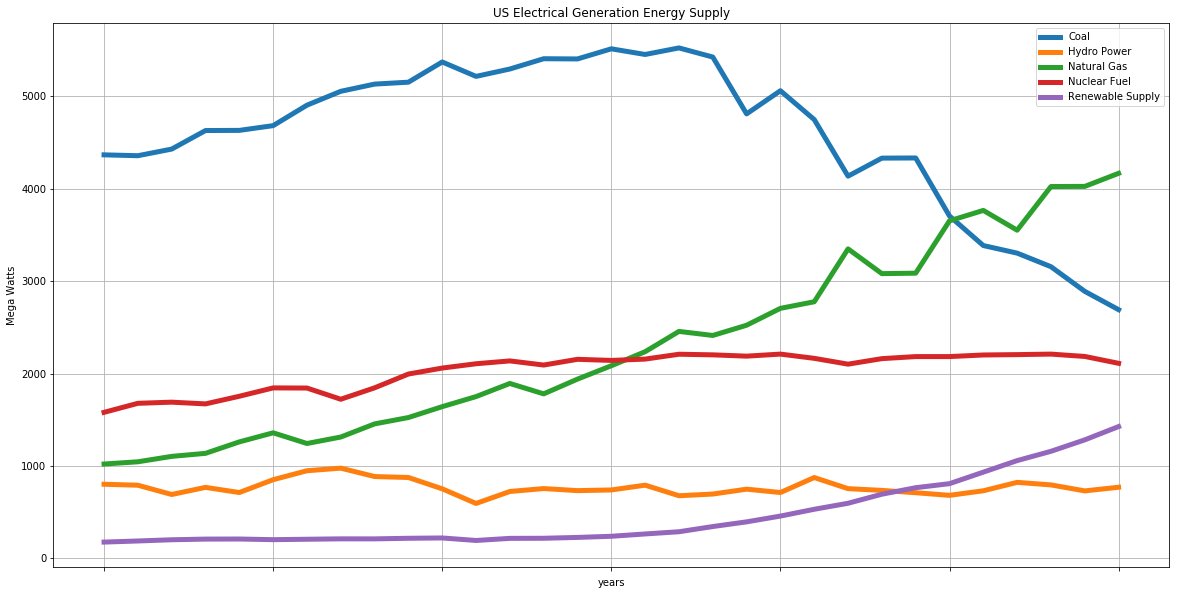

In [148]:


ax = electric_generation_df.plot( kind='line',linewidth=5, figsize=(20,10), title = 'US Electrical Generation Energy Supply')

ax.set_ylabel("Mega Watts")
ax.set_xlabel("years")
ax.grid(True)
plt.savefig("output/Total_electric_generation.png")

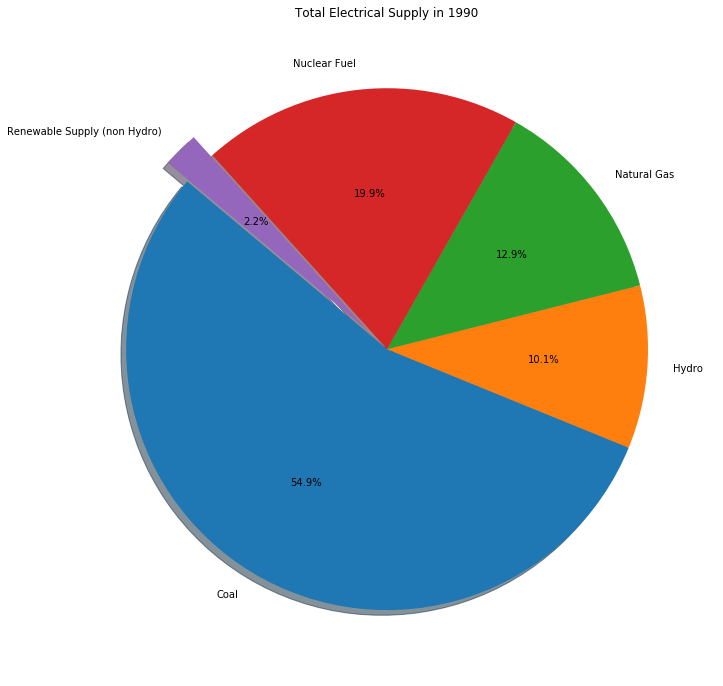

<Figure size 432x288 with 0 Axes>

In [210]:
#Create a Pie Chart for 1990
# Labels for the sections of our pie chart
labels = ["Coal", "Hydro", "Natural Gas", "Nuclear Fuel",   "Renewable Supply (non Hydro)"]

# The values of each section of the pie chart
sizes = electric_generation_df.iloc[0]
# The colors of each section of the pie chart
#colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0, 0, 0.1)


plt.pie(sizes, autopct="%1.1f%%", explode=explode, shadow=True, startangle=140, labels = labels)

fig = plt.gcf()
fig.set_size_inches(12,12)

plt.title("Total Electrical Supply in 1990")

plt.show()
#plt.axis("equal")
plt.savefig("output/TotalElectricalSupply1990.png")

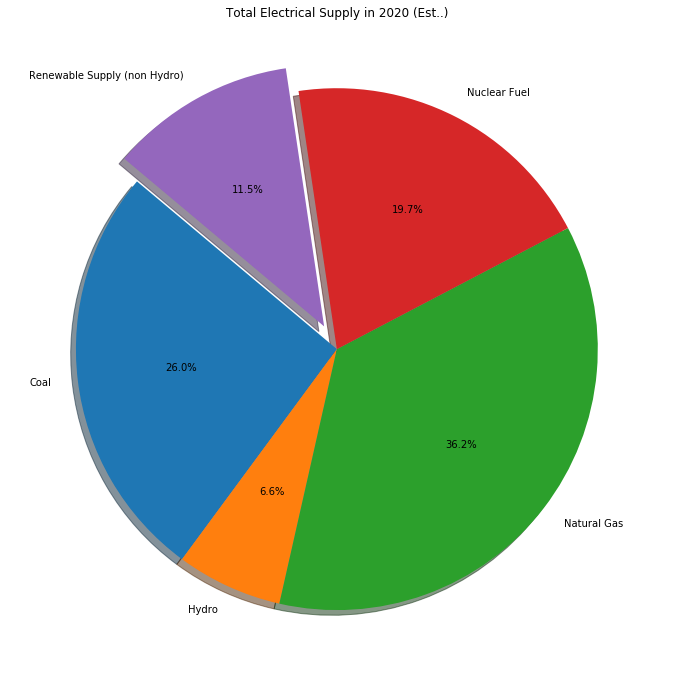

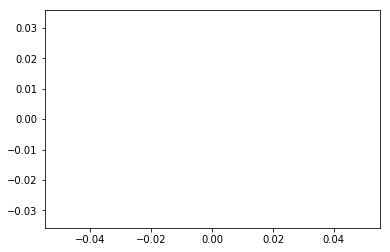

In [160]:
sizes = electric_generation_df.iloc[29]
sizes
# The colors of each section of the pie chart
#colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
#explode = (0.1, 0, 0, 0)

plt.pie(sizes, autopct="%1.1f%%", explode = explode, shadow=True, startangle=140, labels = labels)

fig = plt.gcf()
fig.set_size_inches(12,12)

plt.title("Total Electrical Supply in 2020 (Est..)")

plt.show()
plt.axis("equal")
plt.savefig("output/TotalElectricalSupply2020.png")

In [161]:
# US Renewable Energy Supply

renewable_urls = []
renewable_Net_Capacity = []
renewable_years = []
i = 0

renewable_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.WNEPCAPX_US.A")
renewable_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.SOEPCAPX_US.A")
renewable_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.GEEPCAP_US.A")
renewable_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.HVEPCAP_US.A")

for renew_url in renewable_urls:
    renewable_response = requests.get(renew_url).json()
    #renewable_Net_Capacity.append(i)
    renewable_Net_Capacity.append([])
    renewable_years.append([])
    for response in renewable_response["series"][0]["data"]:
        renewable_Net_Capacity[i].append(response[1])
        renewable_years[i].append(response[0])
    renewable_Net_Capacity[i] = renewable_Net_Capacity[i][::-1]
    renewable_years[i] = renewable_years[i][::-1]
    #print(len(renewable_Net_Capacity[i]))
    i += 1


    

In [162]:
#renewable_Net_Capacity

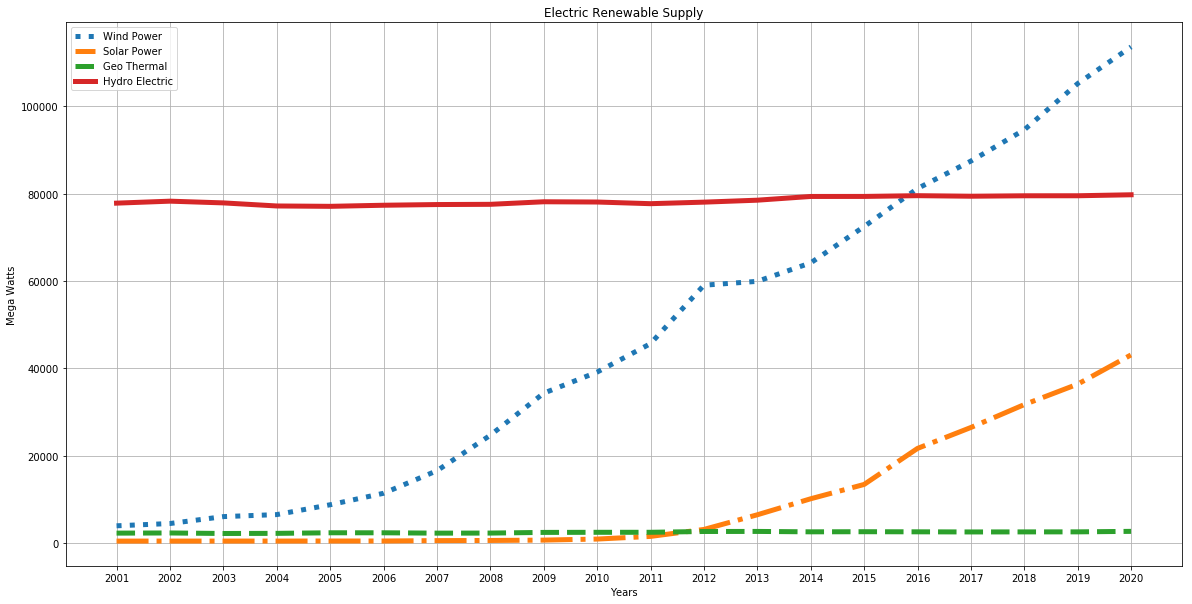

In [163]:
plt.figure(figsize=(20,10))
plt.plot(renewable_years[0], renewable_Net_Capacity[0], label="Wind Power", linewidth=5, linestyle = ':')
plt.plot(renewable_years[0], renewable_Net_Capacity[1], label="Solar Power", linewidth=5, linestyle = '-.')
plt.plot(renewable_years[0], renewable_Net_Capacity[2], label="Geo Thermal", linewidth=5,  linestyle = '--')
plt.plot(renewable_years[0], renewable_Net_Capacity[3], label="Hydro Electric", linewidth=5)
plt.xlabel("Years")
plt.ylabel("Mega Watts")
plt.title("Electric Renewable Supply")

plt.legend()
plt.grid(True)

plt.savefig("output/Electric_Renewable_Supply.png")

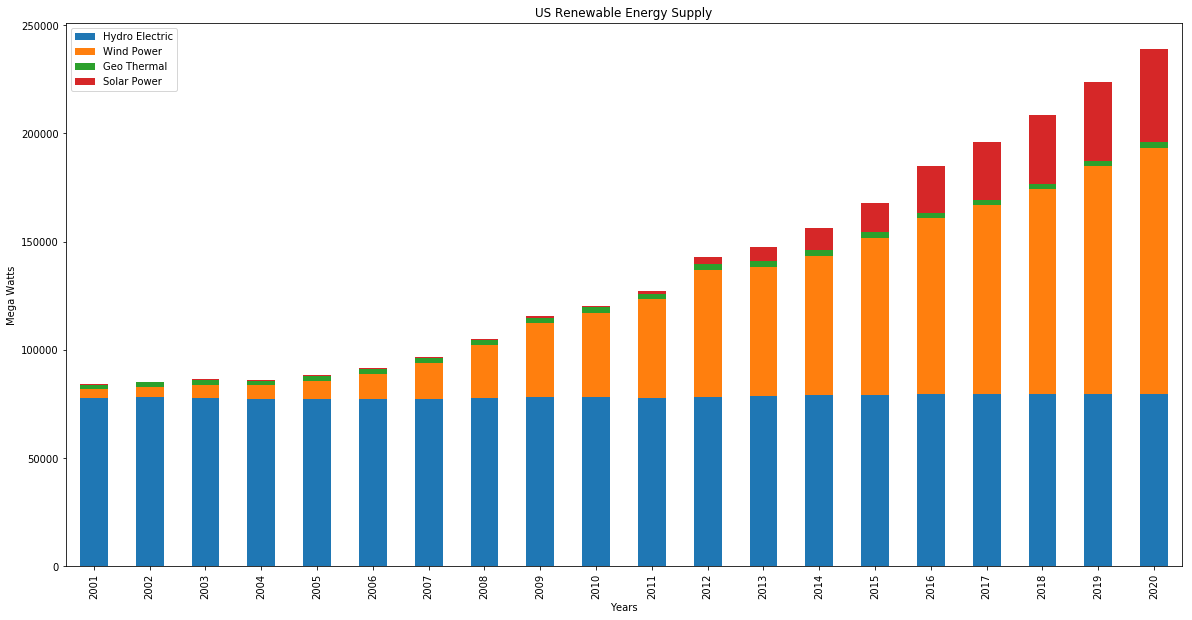

In [164]:

renewable_supply_df = pd.DataFrame({
    'years' : renewable_years[0],
    'Hydro Electric' : renewable_Net_Capacity[3],    
    'Wind Power' : renewable_Net_Capacity[0],
    'Geo Thermal' : renewable_Net_Capacity[2],
    'Solar Power' : renewable_Net_Capacity[1]
    
})

renewable_supply_df.head()

renewable_supply_df = renewable_supply_df.set_index('years')

ax = renewable_supply_df.plot(kind='bar', stacked=True, figsize=(20,10), title = 'US Renewable Energy Supply')

ax.set_ylabel("Mega Watts")
ax.set_xlabel("Years")
plt.savefig("output/Renewable_Supply_Bar.png")

In [165]:
renewable_supply_df.to_csv("resources/renewable_supply.csv")
electric_generation_df.to_csv("resources/electrical_generation.csv")

In [208]:
def percent_change_cal(capacity, percent_change):
    i = 0
    for supply in capacity:
        if(i == 0):
            percent_change.append(0)
        else:
            percent_change.append((supply - capacity[i - 1]) / capacity[i - 1] * 100)
        i += 1

solar_percent_change = []
hydro_percent_change = []
wind_percent_change = []
geo_percent_change = []
percent_change_cal(renewable_Net_Capacity[1], solar_percent_change)
percent_change_cal(renewable_Net_Capacity[3], hydro_percent_change)
percent_change_cal(renewable_Net_Capacity[0], wind_percent_change)
percent_change_cal(renewable_Net_Capacity[2], geo_percent_change)


renewable_percent_change_df = pd.DataFrame({
    'years' : renewable_years[0],
    'Solar % Change' : solar_percent_change,
    'Hydro % Change' : hydro_percent_change,
    'Wind % Change' : wind_percent_change,
    'Geo % Change' : geo_percent_change
})

renewable_percent_change_df = renewable_percent_change_df.set_index('years')

ValueError: invalid literal for int() with base 10: '0.00 %'

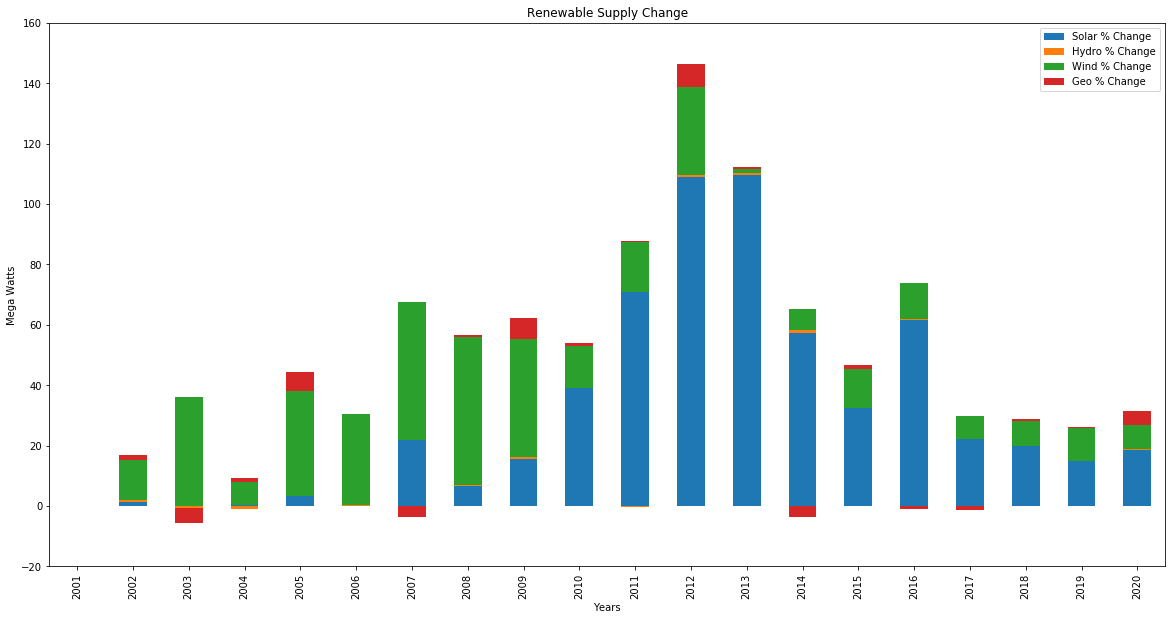

In [209]:
def plotPercentText():
    for year in renewable_years[0]:
        renewable_change_ax.text(int(year) - 2001, int(renewable_percent_change_df["Solar % Change"][year]) + 10, renewable_percent_change_df["Solar % Change"][year], backgroundcolor="white", ha='center', va='top', weight='bold', color='blue')


renewable_change_ax = renewable_percent_change_df.plot(kind='bar', stacked=True, figsize=(20,10), title = 'Renewable Supply Change')

renewable_percent_change_df = renewable_percent_change_df.applymap("{0:.2f} %".format)
renewable_change_ax.set_ylabel("Mega Watts")
renewable_change_ax.set_xlabel("Years")
renewable_change_ax.set_ylim(-20, 160)
plotPercentText()

plt.savefig("output/Renewable_Supply_change_Bar.png")

In [171]:
electric_generation_df.head()

,Coal,Hydro Power,Natural Gas,Nuclear Fuel,Renewable Supply
years,,,,,
1990,4367.154737,802.372182,1021.274395,1580.442953,176.362263
1991,4357.870542,791.764901,1045.350731,1678.260512,188.436340
1992,4429.524696,691.497277,1104.028339,1690.645527,201.556891
1993,4630.329403,768.476733,1136.785748,1672.030723,208.803513
1994,4632.037983,712.673240,1260.873101,1754.629677,209.685323


In [175]:
coal_supply_percent_change = []
hydro_supply_percent_change = []
natural_gas_percent_change = []
Nuclear_fuel_percent_change = []
Pumped_hydro_percent_change = []
renewable_percent_change = []

percent_change_cal(electric_generation_df['Coal'], coal_supply_percent_change)
percent_change_cal(electric_generation_df['Hydro Power'], hydro_supply_percent_change)
percent_change_cal(electric_generation_df['Natural Gas'], natural_gas_percent_change)
percent_change_cal(electric_generation_df['Nuclear Fuel'], Nuclear_fuel_percent_change)
#percent_change_cal(electric_generation_df['Pumped Hydro Power'], Pumped_hydro_percent_change)
percent_change_cal(electric_generation_df['Renewable Supply'], renewable_percent_change)

#percent_change_cal(renewable_Net_Capacity[3], hydro_percent_change)
#percent_change_cal(renewable_Net_Capacity[0], wind_percent_change)
#percent_change_cal(renewable_Net_Capacity[2], geo_percent_change)
print(electric_generation_df.index.values)
#hydro_supply_percent_change


['1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999'
 '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019'
 '2020']


In [182]:
electric_supply_percent_change_df = pd.DataFrame({
    'years' : electric_generation_df.index.values,
    'Coal % Change' : coal_supply_percent_change,
    'Hydro % Change' : hydro_supply_percent_change,
    'Natural Gas % Change' : natural_gas_percent_change,
    'Nuclear Fuel % Change' : Nuclear_fuel_percent_change,
    'Renewable Supply % Change' : renewable_percent_change,
})

electric_supply_percent_change_df = electric_supply_percent_change_df.set_index('years')

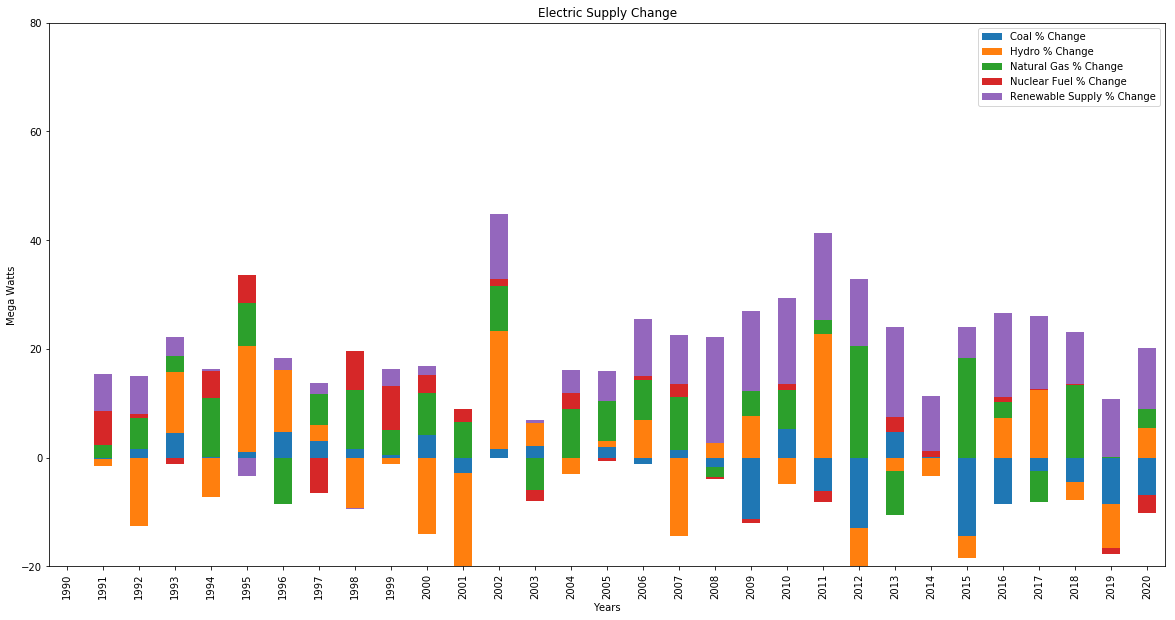

In [183]:

electric_supply_change_ax = electric_supply_percent_change_df.plot(kind='bar', stacked=True, figsize=(20,10), title = 'Electric Supply Change')

electric_supply_change_ax.set_ylabel("Mega Watts")
electric_supply_change_ax.set_xlabel("Years")
electric_supply_change_ax.set_ylim(-20, 80)
plt.savefig("output/Total_Supply_change_Bar.png")

In [184]:
coal_min_supply_value = electric_supply_percent_change_df["Coal % Change"].min()
coal_min_supply_year = int(electric_supply_percent_change_df[electric_supply_percent_change_df["Coal % Change"]==coal_min_supply_value].index.values)
coal_max_supply_value = electric_supply_percent_change_df["Coal % Change"].max()
coal_max_supply_year = int(electric_supply_percent_change_df[electric_supply_percent_change_df["Coal % Change"]==coal_max_supply_value].index.values)

# find the difference between most and least emissions
coal_supply_change = (coal_max_supply_value - coal_min_supply_value)

#find the percentage change from lowest year to highest year
total_coal_percent_change = (coal_supply_change / coal_min_supply_value) *100

print(f"{coal_min_supply_year} had the least amount of coal generation with {coal_min_supply_value} million meric tons.")
print(f"{int(coal_max_supply_year)} has the most amount of total coal generation with {coal_max_supply_value} million meric tons.")
print(f"The difference in total coal generation from 1991 and 2007 is {coal_supply_change} million metric tons.")
print(f"The percentage change in coal generation from the lowest year to highest year is {total_coal_percent_change}%")

2015 had the least amount of coal generation with -14.497733651787886 million meric tons.
2010 has the most amount of total coal generation with 5.204499374995693 million meric tons.
The difference in total coal generation from 1991 and 2007 is 19.70223302678358 million metric tons.
The percentage change in coal generation from the lowest year to highest year is -135.89871010186388%


In [220]:
def percentAnalysis(customDataFrame, columnName, fuelName, fuelUnits):
    min_supply_value = customDataFrame[columnName].min()
    min_supply_year = int(customDataFrame[customDataFrame[columnName]==min_supply_value].index.values)
    max_supply_value = customDataFrame[columnName].max()
    max_supply_year = int(customDataFrame[customDataFrame[columnName]==max_supply_value].index.values)

    # find the difference between most and least emissions
    total_supply_change = (max_supply_value - min_supply_value)

    #find the percentage change from lowest year to highest year
    total_percent_change = (total_supply_change / min_supply_value) *100

    print(f"{min_supply_year} had the least amount of {fuelName} generation with {min_supply_value} {fuelUnits}.")
    print(f"{int(max_supply_year)} has the most amount of total {fuelName} generation with {max_supply_value} {fuelUnits}.")
    print(f"The difference in total {fuelName} generation from {min_supply_year} and {max_supply_year} is {total_supply_change} {fuelUnits}.")
    print(f"The percentage change in {fuelName} generation from the lowest year to highest year is {total_percent_change}%")
    
percentAnalysis(electric_generation_df, "Coal", "Coal", "Mega Watts")
percentAnalysis(electric_generation_df, "Hydro Power", "Hydro Power", "Mega Watts")
percentAnalysis(electric_generation_df, "Natural Gas", "Natural Gas", "Mega Watts")
percentAnalysis(electric_generation_df, "Nuclear Fuel", "Nuclear Fuel", "Mega Watts")
percentAnalysis(electric_generation_df, "Renewable Supply", "Renewable Supply", "Mega Watts")


#percentAnalysis(electric_generation_df, "Hydro % Change", "Hydro")

2020 had the least amount of Coal generation with 2691.4775082 Mega Watts.
2007 has the most amount of total Coal generation with 5524.5358272 Mega Watts.
The difference in total Coal generation from 2020 and 2007 is 2833.058319 Mega Watts.
The percentage change in Coal generation from the lowest year to highest year is 105.26033787645083%
2001 had the least amount of Hydro Power generation with 594.41381271 Mega Watts.
1997 has the most amount of total Hydro Power generation with 976.58255124 Mega Watts.
The difference in total Hydro Power generation from 2001 and 1997 is 382.16873853000004 Mega Watts.
The percentage change in Hydro Power generation from the lowest year to highest year is 64.29338120318056%
1990 had the least amount of Natural Gas generation with 1021.2743946 Mega Watts.
2020 has the most amount of total Natural Gas generation with 4167.1879945 Mega Watts.
The difference in total Natural Gas generation from 1990 and 2020 is 3145.9135999 Mega Watts.
The percentage chan

In [221]:
percentAnalysis(renewable_supply_df, "Hydro Electric", "Hydro Electric", "Mega Watts")
percentAnalysis(renewable_supply_df, "Wind Power", "Wind Power", "Mega Watts")
percentAnalysis(renewable_supply_df, "Geo Thermal", "Geo Thermal", "Mega Watts")
percentAnalysis(renewable_supply_df, "Solar Power", "Solar Power", "Mega Watts")

2005 had the least amount of Hydro Electric generation with 77112.83 Mega Watts.
2020 has the most amount of total Hydro Electric generation with 79763.0 Mega Watts.
The difference in total Hydro Electric generation from 2005 and 2020 is 2650.1699999999983 Mega Watts.
The percentage change in Hydro Electric generation from the lowest year to highest year is 3.4367432760540604%
2001 had the least amount of Wind Power generation with 3893.64 Mega Watts.
2020 has the most amount of total Wind Power generation with 113651.5 Mega Watts.
The difference in total Wind Power generation from 2001 and 2020 is 109757.86 Mega Watts.
The percentage change in Wind Power generation from the lowest year to highest year is 2818.9010797094747%
2003 had the least amount of Geo Thermal generation with 2135.25 Mega Watts.
2020 has the most amount of total Geo Thermal generation with 2622.1 Mega Watts.
The difference in total Geo Thermal generation from 2003 and 2020 is 486.8499999999999 Mega Watts.
The perc